In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("../dataset/economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
## drop the unneccessary columns 
df.drop(['year','month'],axis = 1,inplace=True)

In [5]:
df.head(3)

,Unnamed: 0,interest_rate,unemployment_rate,index_price
0,0,2.75,5.3,1464
1,1,2.50,5.3,1394
2,2,2.50,5.3,1357


In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head(3)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357


In [8]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

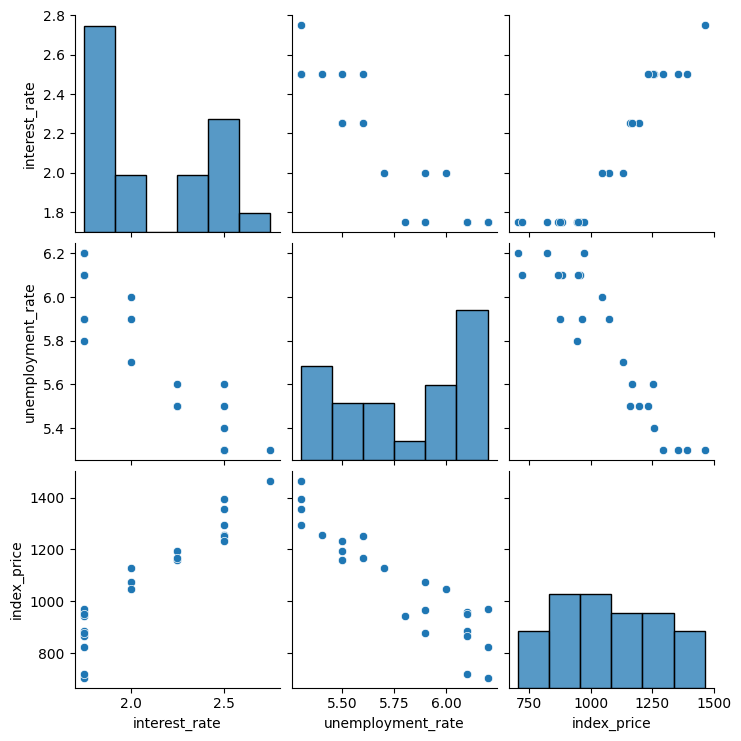

In [9]:
import seaborn as sns
sns.pairplot(df)

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

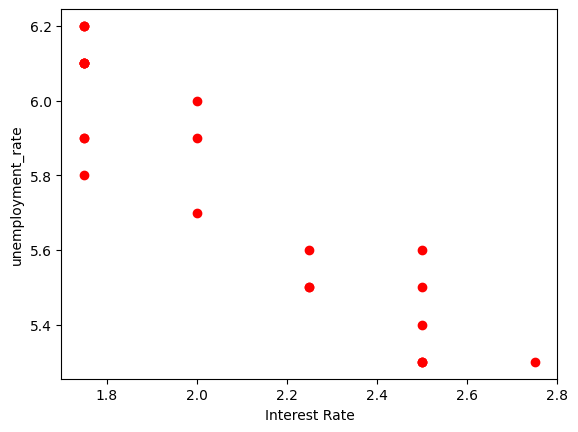

In [23]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color = 'r')
plt.xlabel("Interest Rate")
plt.ylabel("unemployment_rate")

In [25]:
x = df[['interest_rate','unemployment_rate']]
y = df['index_price']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

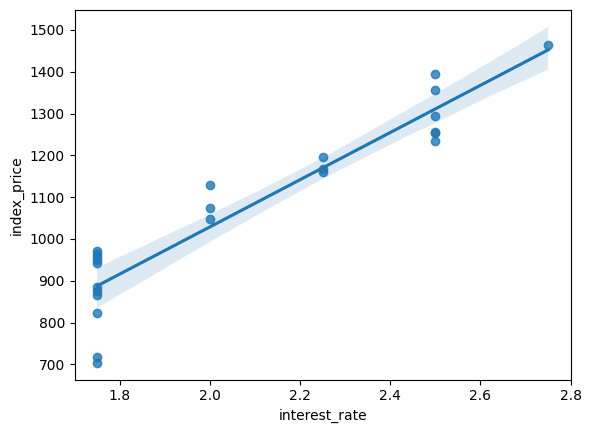

In [29]:
import seaborn as sns
sns.regplot(x = df['interest_rate'],y = df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

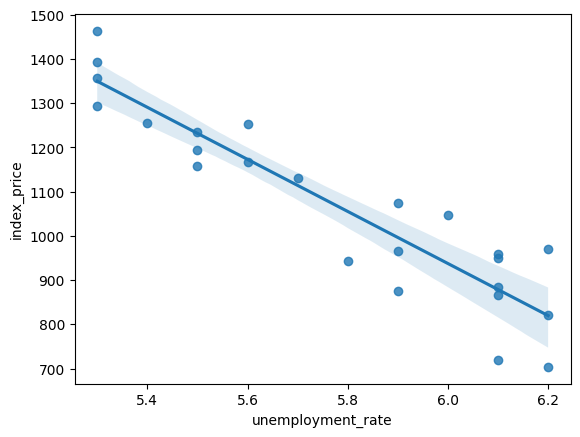

In [30]:
sns.regplot(x = df['unemployment_rate'],y = df['index_price'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(reg,x_train,y_train,scoring='neg_mean_squared_error',cv = 3)    ## as we know about the cross validation 
'''
It gonna split the train data(eg. 900) and cv = 5 means splits into 5 records, which is 180 --> now it will take first 180 as test and rest is train 
The second iteration the second 180 as test and rest is train --> by this we can get FIVE neg_mean_square_error that specified in the scoring,
then we can average
'''
np.mean(validation_score)  ## average the neg_mena_squared_error

-5914.828180162386

In [38]:
y_pred = reg.predict(x_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [48]:
score = r2_score(y_test,y_pred)
adjr2 = 1-(1-score)* (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
adjr2

0.7131630152428576

## Assumptions

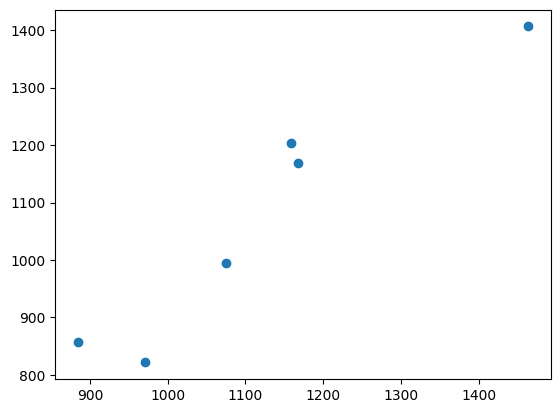

In [49]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='index_price', ylabel='Density'>

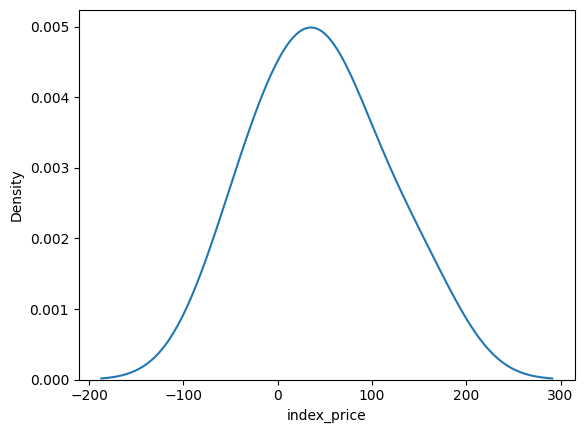

In [51]:
resudials = y_test - y_pred
sns.kdeplot(resudials)

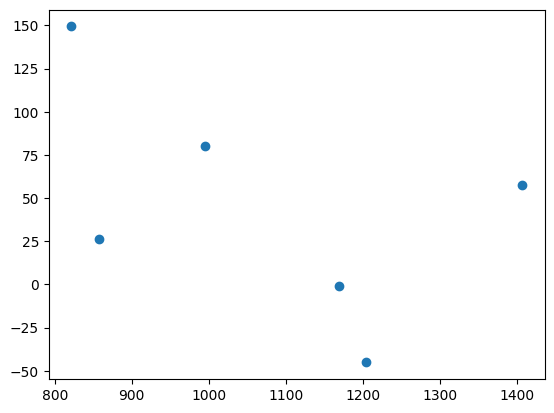

In [52]:
plt.scatter(y_pred,resudials)

In [55]:
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()

In [56]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 22 Jun 2025   Prob (F-statistic):                       0.754
Time:                        16:02:00   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\sakth\OneDrive\Desktop\ml_saga\saga\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [58]:
reg.coef_

array([  88.27275507, -116.25716066])